#### MA124 Maths by Computer
# Project: Modelling in Epidemiology

#### Background
Epidemiological models are increasingly used during infectious disease outbreaks to make outbreak projections and to guide control interventions. This project involves developing simple computational models of outbreaks and using them to predict the effects of different interventions. It also involves using stochastic epidemiological models (models that include randomness) to predict the risk that early cases at the beginning of an outbreak lead on to a major epidemic (with a large number of cases) as opposed to fade out as a minor outbreak (with a small number of cases). 

If more details are required about the background epidemiological modelling theory, please rewatch the Epidemiology Lecture, available on the MA124 moodle page.

#### Structure of project
There are six tasks in the document below, tasks A1-A5 and then task B1. Your group should do all six of these tasks. Tasks A1-A5 are worth approximately 60% of the credit for this submission and task B1 is worth the rest (approximately 40%).

#### Notes about submission
Read through the document **MA124 Maths by Computer Tutor Group Projects Information for Students.pdf** on the MA124 Moodle page.

Before submitting see the notes at the end of this document.

#### Allowed libraries for this project 
Python libraries/modules should be used as required to complete the tasks in this project, with no restrictions.

## Section A (worth approximately 60% of the marks)

## The Deterministic SIR model

In the Epidemiology lecture, you met the deterministic SIR model given by a system of three ODEs.

This part of the assignment builds on the "Epidemiology I code" notebook, which provides code for numerically solving the SIR model in Python. We are interested in extensions to the SIR model as presented there: specifically, extensions involving public health measures such as vaccination and social distancing.

Note: You are expected to add code and markdown cells to this document as appropriate to provide your responses to the tasks. However, throughout this assignment, please do use the deterministic and stochastic SIR model codes from the Epidemiology I and Epidemiology II code notebooks as required (i.e., you are supposed to copy that code across and adapt it, rather than start coding from scratch).

---

## Task A1. Baseline case (worth approximately 12% of the marks)
**Assignment:** Using Python, solve the deterministic SIR model numerically and examine the solution for one set of parameter values and one initial condition. Then, adapt the code to rerun the analysis multiple times for different infection rates.

Details: 
- Use the following parameter values for the baseline case (where, throughout this Assignment, time is measured in days): $\beta = 2 \times 10^{-5}$, $\mu = 0.1$, $N = 10^{4}$.
- Initiate the numerical solution starting with 3 infected individuals, with the remainder of the population susceptible.
- Produce two plots: a time-series showing $S(t)$, $I(t)$ and $R(t)$ and a phase plane (in the $(S,I)$ plane).
- On both plots, indicate the point on the trajectory where $I$ reaches its maximum as black circles, and print this maximum value (when you print the value, round this value to the largest integer that is less than this value).
- Now repeat this analysis a large number of times for different values of $\beta$ (without generating a figure each time; so as to not generate a huge number of figures!) Plot the maximum value of $I$ as a function of $\beta$, choosing an appropriate range of values of $\beta$ (and sufficiently many values) to be able to see the dependence clearly.

Hint: You might like to Google the appropriate NumPy function that finds the maximum value in a vector. For the last part, use a FOR loop rather than changing the value of $\beta$ manually.

Once you have completed this, you might like to help your team member who is doing Task A4 below!

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

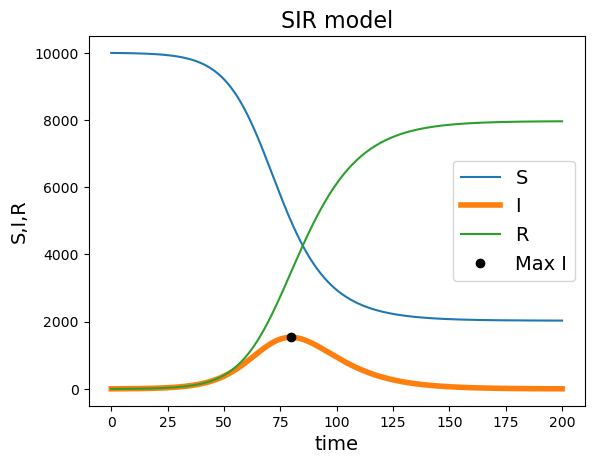

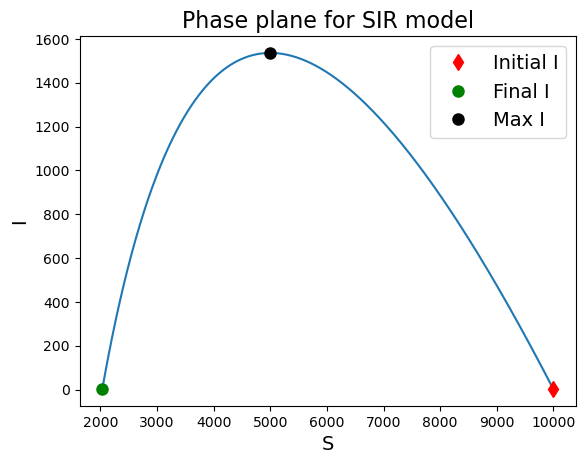

The maximum value of I (rounded down) is: 1535


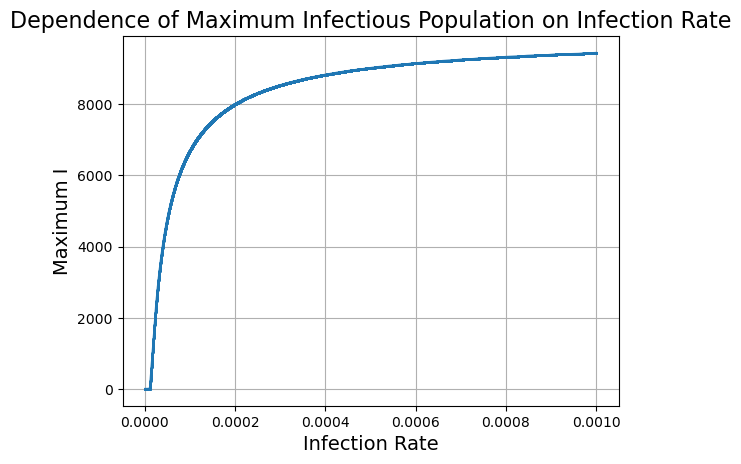

In [1]:
# import libraries
import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call np. function_name rather than numpy.
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

# Define the SIR model differential equations
def SIR(y, t):
    S, I, R = y

    # Parameters
    beta = 2*(10**-5) # Infection rate
    mu = 0.1 # Recovery rate
  
    N = S + I + R # Define total population
    
    # Compute derivatives
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

# --- Problem setup --- #

# set up time grid for the solution
tf = 200
Nsteps = 2000
t = np.linspace(0, tf, Nsteps+1)

# Set initial conditions and put into array y0
S0 = 10**4 - 3
I0 = 3
R0 = 0
y0 = np.array([S0, I0, R0])

# --- Call the ODE solver and extract solutions --- #
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

# Find out where the maximum number of infected individuals occurs
max_I_index = np.argmax(I)
max_I = int(I[max_I_index]) # Max infected individuals (rounded down)
t_max_I = t[max_I_index] # Time when max infected occurs
S_max_I = S[max_I_index] # Number susceptible when max infected occurs

# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 4, label = "I")
plt.plot(t, R, label = "R")

# labels etc for time evolution of S,I,R
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.plot(t_max_I, max_I, 'ko', label="Max I") # Indicate max infected as a black dot
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)

# labels etc for S,I phase plane
plt.xlabel("S", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.title("Phase plane for SIR model", fontsize = 16)

# put some markers to show initial states, final states and max infected on S,I phase plane
plt.plot(S[0], I[0], 'rd', markersize = 8, label="Initial I")
plt.plot(S[-1], I[-1], 'go', markersize = 8, label="Final I" )
plt.plot(S_max_I, max_I, 'ko', markersize = 8, label="Max I")  
plt.legend(fontsize = 14)
plt.show()

# Print max value of infected individuals
print("The maximum value of I (rounded down) is:", max_I)

# Re-define the SIR model with an adjustable infection rate
def SIR(y, t, beta, mu):
    S, I, R = y
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    return Sdot, Idot, Rdot

# --- Problem setup --- #

# Set up time grid for the solution
tf = 200
Nsteps = 2000
t = np.linspace(0, tf, Nsteps+1)

# Set initial conditions and put into array y0
S0 = 10**4 - 3
I0 = 3
R0 = 0
y0 = np.array([S0, I0, R0])

# Import recovery rate
mu = 0.1  

# Create an array of different infection rates (beta values) to test
beta_values = np.linspace(10**-6, 10**-3, 10000)  # Infection rates ranging from 10^-6 to 10^-3
max_I_values = [] # Store the maximum infected population for each beta

# Loop over the beta values and solve the ODEs for each value
for beta in beta_values:
    y_sol = odeint(SIR, y0, t, args=(beta, mu))
    I = y_sol[:, 1]   # Extract the infected population 
    max_I = np.max(I) # Find the maximum number of infected individuals for this beta
    max_I_values.append(max_I) # Store this value for later plotting

# Plot the relationship between infection rate (beta) and the maximum infected population (max_I)
plt.plot(beta_values, max_I_values, '-o', markersize=1)
plt.xlabel("Infection Rate", fontsize=14)
plt.ylabel("Maximum I", fontsize=14)
plt.title("Dependence of Maximum Infectious Population on Infection Rate", fontsize=16)
plt.grid()
plt.show()

## Task A2. The effect of vaccination (worth approximately 12% of the marks)
**Assignment:** Using Python, solve the deterministic SIR model numerically for different numbers of individuals vaccinated. 

Details:
- Use the following parameter values for the baseline case: $\beta = 2 \times 10^{-5}$, $\mu = 0.1$, $N = 10^{4}$.
- Assume that each simulation starts with 5 infected individuals (with the remainder of the population susceptible, other than those who have been vaccinated).
- Assume that vaccination involves simply withdrawing susceptible individuals from the population (to a new $V$ compartment, which is different to the removed ($R$) compartment) instantaneously at the start of the numerical simulation, and that vaccination is perfectly effective.
- Make a plot of the total number of individuals who are either infected or removed (i.e., $I+R$) after 500 days as a function of the number of vaccinated hosts. Hint: This will require running the SIR model multiple times (once for each value of the number of vaccinated individuals, $V$) using a FOR loop.
- Add markers to the plot corresponding to the (strictly positive) numerical solution of the final size equation (explained in the Lecture and below), in which $N$ is simply reduced by $V$, for values of i) $V = 1000$; ii) $V = 2000$; iii) $V = 3000$.
- Include a derivation of the final size equation in your answer to this task.

- Hint: Recall that the final size equation is $x = N - N \rm{exp} \left( -\frac{\beta x}{\mu} \right)$ in a scenario without vaccination (vaccination then corresponds to reducing the value of $N$). You will have to look up an appropriate Python function to solve this equation numerically. To find the strictly positive solution (rather than the solution $x = 0$) numerically, a sufficiently large "initial guess" may need to be input to the relevant Python function.

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

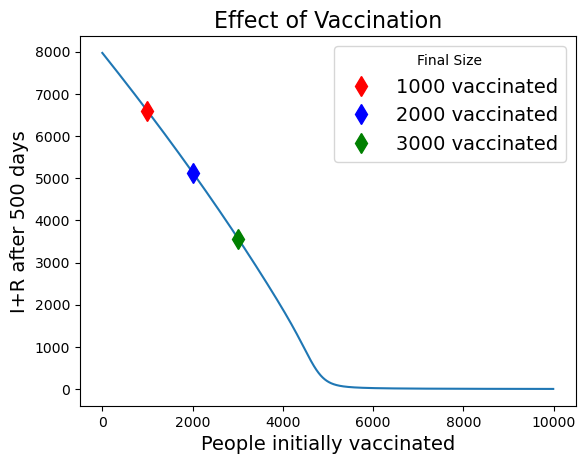

In [2]:
# beta =  2e-5, mu 0.1, N e4 
#5 infected to begin
#if vaccinated moved to V compartment different to R from S
#plot  I+R after 500 days against starting V
#500 days
#add markers for the size equation 



import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import nsolve, Symbol #used to numerically solve the equation in the question
from sympy import exp as spexp 

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 2*10**-5
    mu = 0.1
    
    #N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

def taskA2():
        # set up time grid for the solution
    tf = 500
    Nsteps = 500
    t = np.linspace(0, tf, Nsteps+1)

    # Set initial conditions and put into array y0
    beta = 2*10**-5
    mu = 0.1
    
    vList = np.arange(0,10**4-5) #list containing each possible number of vaccinated people
    IRAfter500 = [] #list to store I+R after 500 days
    
    S0 = 10**4 - 5
    I0 = 5
    R0 = 0
    
    for v in vList: # loop to calculate I + R after 500 days for numeber of vaccinated persons
        y0 = np.array([S0-v, I0, R0])
    
        # --- Call the ODE solver and extract solutions --- #
  
        y_sol = odeint(SIR, y0, t)

        # extract the final , I, R from the solution array y
        I = y_sol[-1,1]
        R = y_sol[-1,2]
        
        IRAfter500.append(I+R)
    
    # --- Plot various interesting things --- #

    # plot the time evolution of the S, I, R
    plt.plot(vList, IRAfter500)  #,label = "I+R")
    # labels etc
    plt.xlabel("People initially vaccinated", fontsize = 14)
    plt.ylabel("I+R after 500 days", fontsize = 14)
    plt.title("Effect of Vaccination", fontsize = 16)
    
    
    equationVs = [1000,2000,3000] #used to solve the final size equation
    x = Symbol('x')
    sizeSolutions = [] #list to store the numerical solution to each size equation
    
    #logic to numerically solve each size equation
    for V in equationVs: 
        equation = (S0- V)*(1 - spexp(-beta*x/mu)) - x
        sizeSolutions.append(nsolve(equation,5000)) #need a high initial guess in order to avoid solutions close to 0 and negative
    
    #plot each final size solution as diamonds on the graph
    plt.plot(equationVs[0], sizeSolutions[0], 'rd', markersize = 10, label="1000 vaccinated") #market at 1000
    plt.plot(equationVs[1], sizeSolutions[1], 'bd', markersize = 10, label="2000 vaccinated") #2000
    plt.plot(equationVs[2], sizeSolutions[2], 'gd', markersize = 10, label="3000 vaccinated") #3000
    
    
    plt.legend(fontsize = 14, title = "Final Size")
    plt.show()        

    
taskA2()



### Derivation of the Final Size Equation
Since we have $\beta = 2 \times 10^{-5}$, $\mu = 0.1$, $N = 10^{4}$ we get

$$
\frac{{\rm d} S}{{\rm d} t}  = - 2 \times 10^{-5} S I, \quad 
\frac{{\rm d} I}{{\rm d} t}  = 2 \times 10^{-5} S I - 0.1I, \quad 
\frac{{\rm d} R}{{\rm d} t}  = 0.1 I.
$$

So by multiplying $\frac{{\rm d} I}{{\rm d} t}$ by the reciprocal of $\frac{{\rm d} S}{{\rm d} t}$ we get
$$
\frac{{\rm d} I}{{\rm d} S} = -1 + \frac{0.1}{2 \times 10^{-5} S} =-1 + \frac{5000}{S}
$$
So by trivial integration and for some $C \in \mathbb{R}$ we get

$$
I = -S + 5000 \log(S) + C
$$ 
So by considering initial conditions we get
$$
C = I(0) + S(0) - 5000 \log(S(0))
$$ 

Since $I(0) + S(0) + V = N$ we get,

$$
I = -S + 5000 \log(S) + (N-V) - 5000 \log(S(0))
$$

So for some T after the outbreak ends we get, $ I(T) = 0$ and $S(T) + R(T) + V = N$ so, letting $x = R(T)$ we have

$$
0 = -(N-x-V) + 5000 \log(N-x-V) + (N-V) - 5000 \log(S(0)) = x + 5000 \log (N-x-V) - 5000 \log (S(0))
$$

So by rearrangment

$$
\frac{-x}{5000} = \log(\frac{N-x-V}{S(0)})
$$
So by exponentiation
$$
\exp(\frac{-x}{5000}) = \frac{N-x-V}{S(0)}
$$

So since $I(0)$ is small, $R(0) = 0$ and $ S(0) = N - V - R(0) - I(0)$ we get $S(0) \approx N - V$ so by rearrangment

$$
x \approx (10^{4}-V) - (10^{4}-V) \exp(\frac{-x}{5000})
$$
by substituting $N = 10^{4}$ as required

## Task A3. The effect of social distancing (worth approximately 12% of the marks)

The introduction and/or removal of social distancing can be modelled by varying the infection rate parameter, $\beta$. In this exercise, we will use the following time-dependent infection rate parameter:

$$
\beta(t)  = 2 \times 10^{-7} \text{  whenever  } t < T, \\
\beta(t)  = 1.5 \times 10^{-7} \text{  whenever  } T \le t \le T + 30, \\
\beta(t)  = 2 \times 10^{-7} \text{  whenever  } t > T + 30. \\
$$

**Assignment:** Using Python, run the deterministic SIR model for the social distancing strategy described above.

Details:
- For this task, use the values $\mu = 0.1$, $N = 10^{6}$, and assume that the initial values of $(S,I,R)$ are $(N-5,5,0)$.
- Run the SIR model, adapted according to the time-dependent value of $\beta$ described above, for a value of $T = 30$ days. Plot a time-series showing $S(t)$, $I(t)$ and $R(t)$.
- Consider a scenario in which $T$ is not necessarily 30 days, and can instead take a fixed integer value between 1 and 200 days. Write a FOR loop to identify the value of $T$ that minimises the maximum value of $I$ in the model simulation. Plot the maximum value of $I$ as a function of $T$, and print the value of $T$ that "flattens the curve" most.

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

In [14]:
# import libraries

import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call np. function_name rather than numpy.
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [15]:
# --- First define the RHS of ODE system --- #

def SIR(y, t, T):
    
    # returns RHS of the SIR model
    S, I, R = y

    
    #   Change beta depending on time
    
    if(t >= T and t <= T + 30):
        beta = 1.5*(10**-7)
    else:
        beta = 2*(10**-7)
    #beta = 3*(10**-6)
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

In [16]:
def getMaxIValForT(T):  #   Finds peak number infected at any one day for a specific T value
    # --- Problem setup --- #

    # set up time grid for the solution
    tf = 300
    Nsteps = 1000
    t = np.linspace(0, tf, Nsteps+1)

    # Set initial conditions and put into array y0
    S0 = 10**6 - 5
    I0 = 5
    R0 = 0
    y0 = np.array([S0, I0, R0])
    
    y_sol = odeint(SIR, y0, t, args=(T,))
    maxIVal = np.max(y_sol[:,1])
    return(maxIVal)

In [17]:
# --- Problem setup --- #

# set up time grid for the solution
tf = 300
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)
#T = 99
T=30

# Set initial conditions and put into array y0
S0 = 10**6 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

In [18]:
# --- Call the ODE solver and extract solutions --- #

y_sol = odeint(SIR, y0, t, args=(T,))
maxIVal = np.max(y_sol[:,1])
# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

In [21]:
# --- Call the ODE solver and extract solutions --- #

y_sol = odeint(SIR, y0, t, args=(-100,))    #   -100 so we use default behaviour with no social distancing
# extract S, I, R from the solution array y
Sreg = y_sol[:,0]
Ireg = y_sol[:,1]
Rreg = y_sol[:,2]

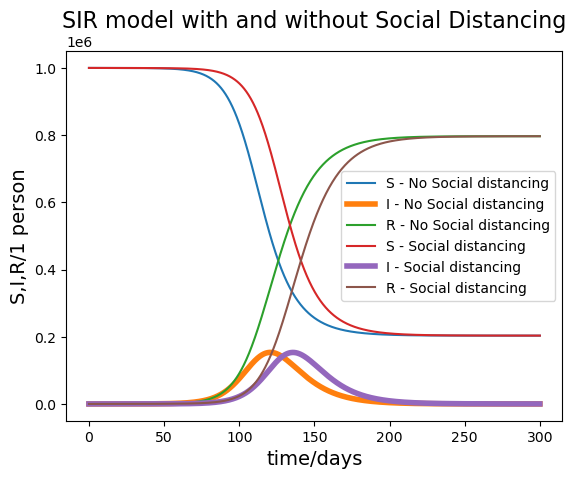

At the end of the simulation, the final values of S, I, and R are (rounded):
S(t=tf) = 203323
I(t=tf) = 25
R(t=tf) = 796652
153249.45641510343


In [31]:
# --- Plot various interesting things --- #

#   Add the version with Social distancing
# plot the time evolution of the S, I, R
plt.plot(t, Sreg, label = "S - No Social distancing")
plt.plot(t, Ireg, lw = 4, label = "I - No Social distancing")
plt.plot(t, Rreg, label = "R - No Social distancing")

#   Add no social distancing for comparison  
plt.plot(t, S, label = "S - Social distancing")
plt.plot(t, I, lw = 4, label = "I - Social distancing")
plt.plot(t, R, label = "R - Social distancing")

# labels etc
plt.xlabel("time/days", fontsize = 14)
plt.ylabel("S,I,R/1 person", fontsize = 14)
plt.title("SIR model with and without Social Distancing", fontsize = 16)

plt.legend(fontsize = 10,loc='right')
plt.show()  

# --- Report the final values of S, I, R.  --- #

#print("At the end of the simulation, the final values of S, I, and R are (rounded):")
#print("S(t=tf) =", round(S[-1]))
#print("I(t=tf) =", round(I[-1]))
#print("R(t=tf) =", round(R[-1]))
#print(maxIVal)

The above time series plot shows the effect of early social distancing or similar control measures on the spread of the disease, by comparison with the no social distancing case we can see that the overal peak is unchanged in shape. However, the time of that peak has moved back due to the added Social distancing.

The value of T for which the peak number of infected is minimised/the curve is flattened the most is 99, and the maximum infected was 90856


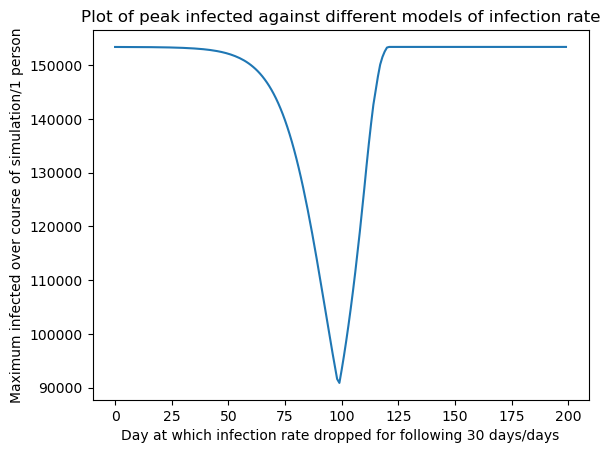

In [32]:
currMinOfPeakI = getMaxIValForT(0)
indexOfCurMin = 0
maximunAmountInfectedForEachT = np.zeros(200)


for i in range(200):
    #   newMinOfMaxI tracks the smallest amount of people maximally infected for a given T
    newMaxI = getMaxIValForT(i)
    maximunAmountInfectedForEachT[i] = newMaxI
    
    if(newMaxI < currMinOfPeakI):
        currMinOfPeakI = newMaxI
        indexOfCurMin = i

print(f"The value of T for which the peak number of infected is minimised/the curve is flattened the most is {indexOfCurMin}, and the maximum infected was {round(currMinOfPeakI)}")

plt.plot(range(200), maximunAmountInfectedForEachT)
plt.xlabel("Day at which infection rate dropped for following 30 days/days")
plt.ylabel("Maximum infected over course of simulation/1 person")
plt.title("Plot of peak infected against different models of infection rate")
plt.show()

We can see the T value minimising the peak infected is positioned shortly before the peak with no social distancing would be (peak is around t = 115). This makes sense as this is when the highest number of infected people are present, so the greatest effect on new infections can be had. We might expect the infection count to rebound as soon as social distancing is removed, and it does but not fully, as the first peak infections will have provided natural immunity to a significant part of the population.
This second peak can be seen in the graph below.

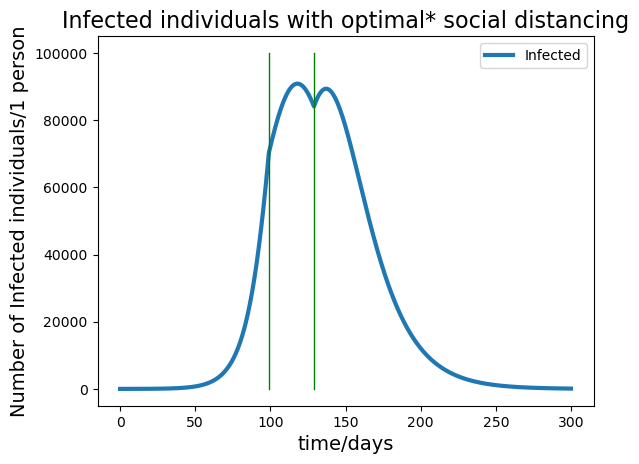

In [41]:
# --- Call the ODE solver and extract solutions --- #

y_sol = odeint(SIR, y0, t, args=(99,))    #   -100 so we use default behaviour with no social distancing
# extract S, I, R from the solution array y

I = y_sol[:,1]


plt.plot(t, I, lw = 3, label = "Infected")
plt.plot([99, 99], [0, 100000], color='g', linestyle='-', linewidth=1)
plt.plot([129, 129], [0, 100000], color='g', linestyle='-', linewidth=1)

plt.xlabel("time/days", fontsize = 14)
plt.ylabel("Number of Infected individuals/1 person", fontsize = 14)
plt.title("Infected individuals with optimal* social distancing", fontsize = 16)
plt.legend(fontsize = 10)
plt.show()  


* Note the optimal is only with respect to minimising peak infected count
* The green bars represent when social distancing started and ended respectively

## The Stochastic SIR model


This part of the assignment builds on the "Epidemiology II code" notebook, which provides code for running one simulation of the stochastic SIR model in Python. We are interested in running simulations to compare the dynamics of the deterministic SIR model and stochastic SIR model, and to estimate the probability of a major outbreak when a single infected individual enters an entirely susceptible population using the stochastic SIR model.

---

## Task A4. Comparison between the stochastic and deterministic SIR models (worth approximately 12% of the marks)

**Assignment:** The end goal of this task is to run 100 simulations of the stochastic SIR model, generate a plot showing the mean value of $I(t)$ (averaged across all of the simulations) versus $t$, and then compare this output to the analogous output from the deterministic SIR model.

Details: 
- We will use the following parameter values for the baseline case (where, throughout this assignment, time is measured in days): $\beta = 3 \times 10^{-4}$, $\mu = 0.1$, $N = 10^{3}$.
- In each simulation, there will be 10 individuals infected initially (with the rest of the population susceptible).
- The most challenging part of this task is that, in each simulation, events will occur at different times. As a result, we have to write code that, for each simulation, extracts the value of $I(t)$ at a set of pre-defined values of $t$. One way to do this is to set up a vector at the beginning of the simulation containing 201 blank entries (corresponding to $t = 0, 0.5, 1, 1.5, ..., 100$), and then populate the relevant entries after each event (i.e. put the value of $I$ before the current event in all entries corresponding to times between the last event time and the current one). This vector can then be averaged across all simulations.
- The code in the Python notebook entitled "Epidemiology_Part_A4_with_Errors" is a first attempt at writing such code (i.e. code that outputs a vector $I_{vals}$ with entries recording the values of $I$ at $t = 0, 0.5, 1, 1.5, ..., 100$) for a single simulation of the stochastic SIR model, but it contains three mistakes. Correct this code (and then copy the resulting code into your answer to this task in this notebook).
- Now that you have corrected the code described above, run 100 simulations of the stochastic SIR model and plot the average values of the vector $I_{vals}$, plotted at $t = 0, 0.5, 1, 1.5, ..., 100$.
- Finally, on the same axes, plot the analogous numerical solution of the determinstic SIR model. The team member who completed Task A1 (above) should be able to help you with this.

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

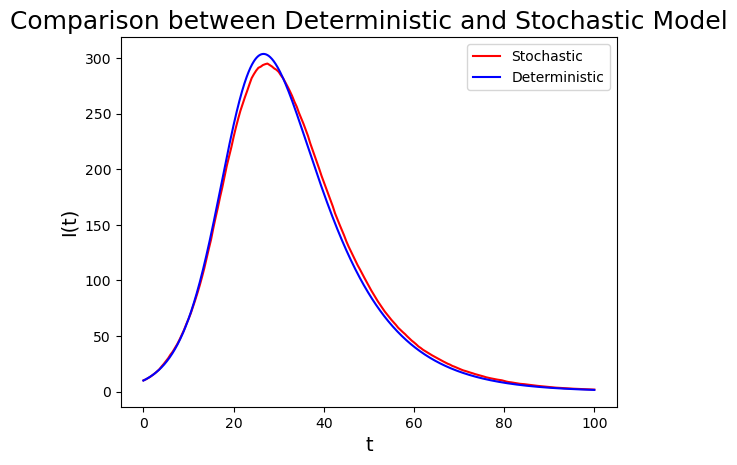

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Stochastic Simulation Code

beta = 3.0*10**-4 # Mistake 1: used -3 not -4
mu = 0.1
IValsCumulative = np.empty((101, 201)) # Initialises an array for storing the infected values across all simulations at each time interval for calculating the mean later

for simulations in range(101):

    SVec = np.array([])
    IVec = np.array([])
    RVec = np.array([])
    tVec = np.array([])

    tVals = np.array([i*0.5 for i in range(201)])
    IVals = np.array([0 for i in range(201)])

    S = 10**3 - 10
    I = 10
    R = 0
    t = 0

    IVals[0] = I

    SVec = np.append(SVec, S)
    IVec = np.append(IVec, I)
    RVec = np.append(RVec, R)
    tVec = np.append(tVec, t)

    while I > 0:
    
        previous_time = t
    
        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)
    
        new_time = t
    
        for i in range(201):
            if tVals[i] > previous_time and tVals[i] < new_time: # Mistake 2: incomplete inequality
                IVals[i] = I
    
        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate: # Mistake 3: forgot to divide by totalRate
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
        
        SVec = np.append(SVec, S)
        IVec = np.append(IVec, I)
        RVec = np.append(RVec, R)
        tVec = np.append(tVec, t)
    
    for k in range(201):
        IValsCumulative[simulations, k] = IVals[k] # Placing the infected values into the cumulative array for each simulation by copying the IVals array for that specific simualation

IValsTotal = IValsCumulative.sum(axis=0)
IValsAverage = IValsTotal / 100 # Calculates average by summing up the number of infected at each time interval across all simulations then dividing by the number of simulations. This finds average infected at each moment in time


# Deterministic Simulation Code

def SIR(y, t):
    S, I, R = y

    beta = 3*(10**-4)
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

tf = 100
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)

S0 = 10**3 - 10
I0 = 10
R0 = 0
y0 = np.array([S0, I0, R0])

y_sol = odeint(SIR, y0, t)

S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

x = np.linspace(0, 100, 201)
plt.plot(x, IValsAverage, 'r', label = 'Stochastic')
plt.plot(t, I, 'b', label = 'Deterministic')
plt.legend()
plt.title('Comparison between Deterministic and Stochastic Model', fontsize=18)
plt.xlabel('t', fontsize=14)
plt.ylabel('I(t)', fontsize=14)
plt.show()

## Task A5. The probability of a major outbreak (worth approximately 12% of the marks)

**Assignment:** Run 1000 simulations of the stochastic SIR model, starting from a single infected individual (with the remainder of the population susceptible). Count the number of simulations in which $I+R$ exceeds 10 before the disease fades out ($I$ hits zero), and compare this to the analytic estimate for the "probability of a major outbreak" described in the Lecture.

Details: 
- Use the following parameter values for the baseline case (where time is again measured in days): $\beta = 3 \times 10^{-4}$, $\mu = 0.1$, $N = 10^{3}$.
- Recall from the lecture that the analytic estimate for the probability of a major outbreak is $p = 1 - \frac{1}{R_0}$, where $R_0 = \frac{\beta N}{\mu}$.
- Run 1000 simulations of the stochastic SIR model. Calculate (and print) the proportion of simulations in which the final value of $I+R$ exceeds 10.
- Calculate and print the analogous analytic estimate for the probability of a major outbreak.

- Hint: To run 1000 simulations of the stochastic SIR model, you will need to use a FOR loop. To run the simulations more quickly, you do not have to store the values of $t$, $S$, $I$ and $R$ after every event (instead, simply store the value of $I + R$ at the end of the simulation).

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

In [11]:
import numpy as np

#parameter values
beta = 3.0 * 10**-4
mu = 0.1
count = 0
N = 10**3 ###specifies number of simulations

for simulations in range(1001): #for loop, works through 1000 simulations
    S = N - 1
    I = 1 #starts with one infected individual
    R = 0 #none initially recovered
    t = 0 #time initially zero

    #generates vector arrays for SIR model (incl time)
    Svec = np.array([])
    Svec = np.append(Svec, S)
    Ivec = np.array([])
    Ivec = np.append(Ivec, I)
    Rvec = np.array([])
    Rvec = np.append(Rvec, R)
    tvec = np.array([])
    tvec = np.append(tvec, t)
    
    while I > 0: #while infected non-zero
        r1 = np.random.uniform(0, 1, 1)#draws samples from uniform distribution
        r2 = np.random.uniform(0, 1, 1)

        totalRate = beta * I * S + mu * I #rate of events occuring
        t = t - (1 / totalRate) * np.log(r1) #time
                
        if r2 < beta * I * S / totalRate: #if one becomes infected
            S -= 1
            I += 1
        else: #else one recovers
            I -= 1
            R += 1
            
        #appends to vectors
        Svec = np.append(Svec, S)
        Ivec = np.append(Ivec, I)
        Rvec = np.append(Rvec, R)
        tvec = np.append(tvec, t)
                
    if (round(Ivec[-1]) + round(Rvec[-1])) > 10: #counts number of simulations in which I + R exceeds 10
        count += 1

print(f"The proportion of simulations in which the final value of I + R exceeds 10 in the stochastic ISR model is {count/simulations}")

#analytic estimate
R_0 = beta*N/mu
p = 1 - 1/R_0

print(f"The analogue analytic estimate for the probability of a major outbreak is {p}.")

The proportion of simulations in which the final value of I + R exceeds 10 in the stochastic ISR model is 0.653
The analogue analytic estimate for the probability of a major outbreak is 0.6666666666666667.


## Section B (worth approximately 40% of the marks)

## Task B1. Extensions
**Assignment:** Using Python, write code to complete the following exercises:

- Consider the variable $M$, which represents the total number of individuals ever infected over the entire course of a simulation of the stochastic SIR model (run until $I$ hits zero) - i.e. the final value of $I + R$. Plot a graph of ${\rm Prob}(M > m)$ as a function of $m$, for the default parameter values described in Task A5 above (compute the probability by running a large number of stochastic simulations and calculating the proportion of simulations in which $M>m$). Hint: You only have to run the simulations once (rather than running multiple simulations for each value of $m$).
- Add a vertical line to the plot marking the value of $m$ that corresponds to the (positive) solution to the "final size equation" described in the Lecture (note: you will have to look up an appropriate Python function to solve this equation numerically, as in Task A2 above).
- Now instead consider the stochastic SIS model described in the paper "Will an outbreak exceed available resources for control? Estimating the risk from invading pathogens using practical definitions of a severe epidemic" by Thompson, Gilligan and Cunniffe (https://royalsocietypublishing.org/doi/epdf/10.1098/rsif.2020.0690). The key difference between the stochastic SIR model and the stochastic SIS model is that, in the stochastic SIS model, individuals go back into the $S$ compartment when they recover (rather than entering the $R$ compartment). Pick either the "Final size" or "Duration" definition of a severe epidemic described in that paper, and write code to reproduce the relevant figure from that article using model simulations (either Fig 4a or Fig 4b; n.b. you are only required to reproduce the solid lines in the chosen figure). Hint: You do not have to simulate the model until $I$ hits zero to make this figure - that might take a very long time. Instead, you can stop each simulation as soon as the relevant maximum value on the x-axis is exceeded (or when $I$ hits zero, if that occurs first).
- Most of this Assignment involved using deterministic and stochastic versions of the basic SIR model. However, the SIR model is quite simple and does not include some important features that affect transmission of pathogens in the real world. Do some research into ways that the SIR model can be extended to include additional real-world realism. Write one or two paragraphs to summarise your findings (including noting some pathogens/diseases for which the extensions that you explain are appropriate).

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*


---

In [45]:
#   Parameters for part B
runAllSimsForPartB3 = False #   If set to True runs all simulations for part 3 this can take up to ~15 minutes

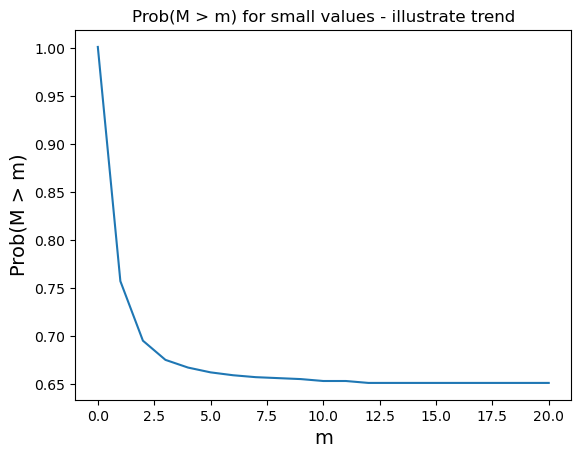

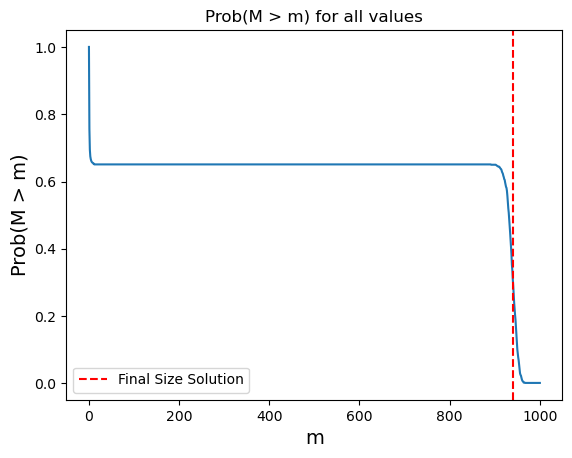

In [13]:
import numpy as np
import matplotlib.pyplot as plt

beta = 3.0 * 10**-4
mu = 0.1
N = 10**3
final = np.array([]) # Initialises array of final infected values for each simulation

for simulations in range(1001):
    S = N - 1
    I = 1
    R = 0
    t = 0

    Svec = np.array([])
    Svec = np.append(Svec, S)
    Ivec = np.array([])
    Ivec = np.append(Ivec, I)
    Rvec = np.array([])
    Rvec = np.append(Rvec, R)
    tvec = np.array([])
    tvec = np.append(tvec, t)
    
    while I > 0:
        r1 = np.random.uniform(0, 1, 1)
        r2 = np.random.uniform(0, 1, 1)

        totalRate = beta * I * S + mu * I
        t = t - (1 / totalRate) * np.log(r1)
                
        if r2 < beta * I * S / totalRate:
            S -= 1
            I += 1
        else:
            I -= 1
            R += 1
            
        Svec = np.append(Svec, S)
        Ivec = np.append(Ivec, I)
        Rvec = np.append(Rvec, R)
        tvec = np.append(tvec, t)

    final = np.append(final, round(Ivec[-1]) + round(Rvec[-1])) # Adds the final infected value to the array (Infected + Recovered)

# Code below computes probability of number of total infected being above a range of m values by summing the number of elements in the array that are above the threshold value then dividing by the number of simulations 

prob = np.array([])
for m in range(1001):
    count = 0
    for i in range(1001):
        if final[i] > m:
            count += 1
    prob = np.append(prob, count/1000)

m = np.linspace(0, 20, 21)
first20Probs = prob[0:21]
plt.title("Prob(M > m) for small values - illustrate trend")
plt.plot(m, first20Probs)
plt.xlabel('m', fontsize=14)
plt.ylabel('Prob(M > m)', fontsize=14)
plt.show()




#vertical line
from sympy import nsolve, Symbol
from sympy import exp as spexp 


#new graph to show prob for all values
plt.title("Prob(M > m) for all values")
plt.plot(np.linspace(0, 1000, 1001), prob)
plt.xlabel('m', fontsize=14)
plt.ylabel('Prob(M > m)', fontsize=14)


#final size calc
x = Symbol('x')

equation = N - N*spexp(-beta*x/mu) - x #rhs of final size equation
finalSizeSolution = nsolve(equation, 1000) #solving final size

plt.axvline(finalSizeSolution, color='r', linestyle='--', label='Final Size Solution')
plt.legend()
plt.show()


In [42]:
#   Part 3 - Stochastic S-I-S model
# import libraries

import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call np. function_name rather than numpy.
import matplotlib.pyplot as plt

In [43]:
# --- Problem setup --- #

# Parameter values

#   want a function getProbOfPersisting
#   This should repeat our stochastic model n times and use each time to check how many T values the infection persisted for
def getProbOfPersisting(R0, numberOfRuns=100,mu = 0.1,popSize = 1000):
    #   R0 = beta * popSize / mu
    #   beta = R0 * mu / popSize
    
    mu = 0.1 
    popSize = 1000
    beta = R0 * mu / popSize
    persistsForTVecDaysCounter = np.zeros(1000)
    #print(persistsForTVecDaysCounter)

    for i in range(popSize):
        # Set up arrays to record event times, and values of S, I and R after after each event

        # Set initial conditions and the initial time
        S = popSize-1
        I = 1
        t = 0

        # Record initial conditions in the S, I, R and t arrays
        #   I suspect this is the slowest part of the loop
        #   appending makes a whole new array each time so is likely slow
        #   I've switched to using Python lists here because I think it might be faster
        
        
        #print(persistsForTVecDaysCounter)
        # --- While the outbreak is ongoing (I > 0), generate events --- #

        while I > 0 and t < 1000:
            
            r1 = np.random.uniform(0, 1, 1)[0]
            totalRate = beta*I*S + mu*I
            t = t - (1/totalRate)*np.log(r1)
            
            r2 = np.random.uniform(0, 1, 1)
            #   P(person is infected) = beta*I*S/totalRate
            if r2 < beta*I*S/totalRate:
                S = S - 1
                I = I + 1
            #   Otherwise someone goes from infected to S again
            else:
                I = I - 1
                S = S + 1
            #   Test for persistence:
            #print("t is ", t)
            if(I == 0):
                for j in range(0, round(t)):
                    #   This could also be made more efficient by doing the loop at the end, allowing us to do multiple in one go
                    persistsForTVecDaysCounter[j] += 1 
                    #print("I = 0 at ", j)
            elif(t >= 1000):
                persistsForTVecDaysCounter += 1
                #print("Reached day 1000 (at least)")
    #print(persistsForTVecDaysCounter)
    probPersistsForTDays = persistsForTVecDaysCounter/popSize
    return(probPersistsForTDays)
    
    
#getProbOfPersisting(1.1)

In [46]:
R_0 = [.8,1.01,1.1,1.3,1.6,2]
persistencePlotR0 = getProbOfPersisting(R_0[0])
print("Finished first sim")
persistencePlotR1 = getProbOfPersisting(R_0[1])
print("Finished second sim")
persistencePlotR2 = getProbOfPersisting(R_0[2])
print("Finished third sim")

#   If you want all sims to run then adjust the parameter at the start of Section B
if(runAllSimsForPartB3 == True):
    persistencePlotR3 = getProbOfPersisting(R_0[3])
    print("Finished fourth sim")
    persistencePlotR4 = getProbOfPersisting(R_0[4])
    print("Finished fifth sim")
    persistencePlotR5 = getProbOfPersisting(R_0[5])
    print("Finished sixth sim")
#   ~ took about 13-14 minutes when I ran this, bulk of time is on the last two sims

Finished first sim
Finished second sim
Finished third sim


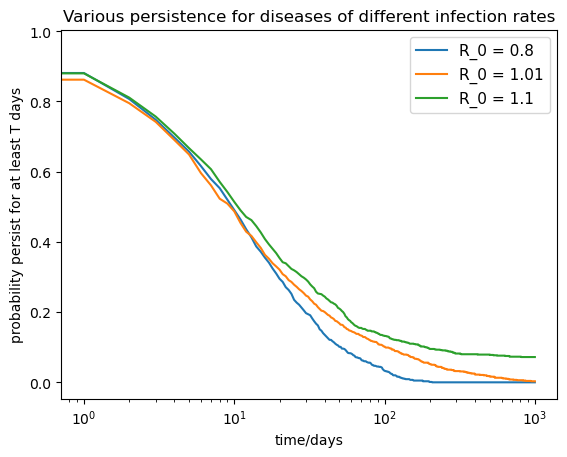

In [47]:
plt.plot(range(0, 1000),persistencePlotR0, label="R_0 = " + str(R_0[0]))
plt.plot(range(0, 1000),persistencePlotR1, label="R_0 = " + str(R_0[1]))
plt.plot(range(0, 1000),persistencePlotR2, label="R_0 = " + str(R_0[2]))

#   If you want all sims to run then adjust the parameter at the start of Section B
if(runAllSimsForPartB3 == True):
    plt.plot(range(0, 1000),persistencePlotR3, label="R_0 = " + str(R_0[3]))
    plt.plot(range(0, 1000),persistencePlotR4, label="R_0 = " + str(R_0[4]))
    plt.plot(range(0, 1000),persistencePlotR5, label="R_0 = " + str(R_0[5]))
plt.xlabel("time/days")
plt.ylabel("probability persist for at least T days")
plt.title("Various persistence for diseases of different infection rates")
plt.legend(fontsize = 11)

plt.xscale('log')

plt.show()

The above graph shows how diseases with lower infection rates

### *Task*

*- Most of this Assignment involved using deterministic and stochastic versions of the basic SIR model. However, the SIR model is quite simple and does not include some important features that affect transmission of pathogens in the real world. Do some research into ways that the SIR model can be extended to include additional real-world realism. Write one or two paragraphs to summarise your findings (including noting some pathogens/diseases for which the extensions that you explain are appropriate).*
## *The basic SIR model*

The differential equations for the basic SIR model are:

$$
\frac{dS}{dt} = -\beta \frac{S I}{N}, \quad
\frac{dI}{dt} = \beta \frac{S I}{N} - \gamma I, \quad
\frac{dR}{dt} = \gamma I
$$

- **S** is the number of susceptible individuals. These are individuals who have not yet contracted the disease but are at risk if exposed to an infected individual.

- **I** is the number of infected individuals. These are individuals who are currently infected with the disease and can spread it to a susceptible individual.

- **R** is the number of recovered (or removed) individuals. This group consists of individuals who have recovered from the disease and are assumed to have immunity, meaning they are no longer susceptible to the infection. In some variations of the model, this group could also represent individuals who have died from the disease or been otherwise removed from the population.

- **β (Beta)** is the transmission rate of the disease.

- **γ (Gamma)** is the recovery (or removal) rate.

- **N** is the total population, given by:

$$
N = S + I + R
$$

## The SEIR model

The **SEIR model** is the most similar model to the SIR model but includes an additional compartment **E** for Exposed individuals who have been infected but are not yet infectious (unlike the Infectious (I) period where individuals can spread the disease to others). This group accounts for the incubation period, where the pathogen is inside your body but hasn’t (yet) started spreading to others. Individuals now move from **Susceptible->Exposed->Infectious->Recovered**. It is particularly useful for diseases with known incubation periods, such as measles, chickenpox or COVID-19 as it allows for more accurate predictions of a disease's spread.

This changes the set of differential equations to:

$$
\frac{dS}{dt} = \sigma N - \mu S - \frac{\beta I S}{N} 
$$

$$
\frac{dE}{dt} = \frac{\beta I S}{N} - (\mu + a)E 
$$

$$
\frac{dI}{dt} = aE - (\gamma + \mu)I 
$$

$$
\frac{dR}{dt} = \gamma I - \mu R
$$

- **E** is for the number of exposed individuals.

- **a (Alpha)** is the rate at which exposed individuals become infectious.

- **σ (Sigma)** is the birth rate.

- **μ (Mu)** is the natural death rate, the rate at which individuals die naturally (not from the disease).


*The other variables represent the same thing as in the basic SIR model.*

- **N**  is given by:

$$
N = S + E + I + R
$$
## The MSIR model

The **MSIR model** includes **(M) for maternal immunity**. This model accounts for the protection that infants may have through antibodies passed from the mother. This immunity typically fades over time, and eventually, the individual becomes susceptible to the disease. This is particularly relevant for diseases like **measles**, where infants are born with passive immunity but eventually lose it as they age. Individuals move from **Maternally-derived immunity -> Susceptible -> Infectious -> Recovered**.

The differential equations for the **MSIR model** are:

$$
\frac{dM}{dt} = \Lambda - \delta M - \mu M
$$

$$
\frac{dS}{dt} = \delta M - \frac{\beta S I}{N} - \mu S
$$

$$
\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I - \mu I
$$

$$
\frac{dR}{dt} = \gamma I - \mu R
$$

- **M** is the number of newborns who have temporary immunity due to maternal antibodies.

- **Λ (Lambda)** is the birth rate (individuals are assumed to enter the **M** compartment if they are born with maternal immunity).

- **δ (Delta)** is the loss of maternal immunity rate.

- **μ (Mu)** is (once again) the natural death rate, the rate at which individuals die naturally (not from the disease).

- **N** (total population), is now given by:

$$
N = M + S + I + R
$$


*The other variables remain the same as in the **basic SIR model**.*

The **natural death rate** is another addition, it could also be incorporated into the basic SIR model.
## The SIRVD model

The **SIRVD model** is another extension of the traditional SIR model but includes two extra compartments: **V** is for Vaccinated individuals who are immune to the disease and thus can prevent the spread of the disease. Whereas **D** is for Dead individuals who have died from the disease, and accounts for the mortality caused by the infection, which is particularily important for more severe diseases. The **SIRVD model** is useful for simulating disease outbreaks where vaccination plays a significant role, as well as for tracking mortality rates. It helps capture the impact of public health interventions such as vaccination campaigns and the severe outcomes like death that some diseases cause. Another difference is that the **R** variable accounts for just those that have recovered (but not removed).
This model is especially appropriate for diseases like COVID-19, influenza, and measles, where vaccines are widely used, and there are varying levels of disease severity leading to death.

Individuals move from **Susceptible -> Infectious** or **Vaccinated**.
Then **infectious individuals -> recovered** or **deceased**.

The set of differential equations to this model are slightly  more complicated. They include time dependent rate-variables for the infection, vaccination, recovery, and fatality rates. They are as follows:

$$
\frac{dS}{dt} = -a(t)SI - v(t)S
$$

$$
\frac{dI}{dt} = a(t)SI - \mu (t)I - \psi (t)I
$$

$$
\frac{dR}{dt} = \mu (t)I
$$

$$
\frac{dV}{dt} = v(t)S
$$

$$
\frac{dD}{dt} = \psi (t)I
$$

- **a(t)** is the infection rate.

- **v(t)** is the vaccination rate.

- **μ(t)** (mu) is the recovery rate.

- **ψ(t)** (psi) is the death rate.

*The other variables remain the same as in the **basic SIR model**.*

- There are now 5 compartments, so **N** (total population), is now given by:

$$
N = S + I + R + V + D
$$
There are plenty of other extensions and simplifications to the SIR model, namely the **SEIS model**, the **SIRD model**, the **SIRV model** and the **MSEIR model**.

## Notes about this submission

You will submit a single Jupyter notebook for this project assignment (this notebook, with your additions).

- The last thing you should do before submitting the notebook is to Restart Kernel and Run All Cells. You should then save the notebook and submit the .ipynb file. **You will lose marks if you submit a notebook that has not been run.**

- You are expected to add code and markdown cells to this document as appropriate to provide your responses to the tasks. However, throughout this assignment, please do use the deterministic and stochastic SIR model codes from the Epidemiology I and Epidemiology II code notebooks as required (i.e., you are supposed to copy that code across and adapt it, rather than start coding from scratch).

- This assignment lends itself to producing a nice document. A good guide for what the final notebook should be like is: if the notebook is run and all code cells and task descriptions are collapsed, the notebook should be readable as a short report, primarily consisting of a short introduction to each section followed by figures and descriptions of the figures.

- Use the comments in the "Epidemiology I code" notebook as a guide to the level of code commenting expected. Each code cell should begin with a comment line or lines concisely stating what the cell is for (alternatively, precede the code cell with a markdown cell explaining what you are about to do). Functions should have comments describing what they do. It can be assumed that the reader understands Python to a basic level (e.g. comments like "Create an array" or "Make a plot" on every line are unnecessary). Add comments to set off blocks of code or to note anything tricky.

---